In [12]:
#import libraries
import numpy as np
import pandas as pd

In [13]:
#load the data
dfa=pd.read_csv('data/SynGen.csv')
dfb=pd.read_csv('data/syntotrels.csv')

In [14]:
#Strip white spaces
dfa=dfa.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
dfb=dfb.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



In [15]:
dfb


,From,totrels,strrels,medrels,ncs
0,alexandra.brand@syngenta.com,1002,381,621,100
1,ioana.tudor@syngenta.com,993,347,646,100
2,camilla.corsi@syngenta.com,721,131,590,74
3,marc.baks@syngenta.com,676,136,540,65
4,diego.aegerter@syngenta.com,285,29,256,26
...,...,...,...,...,...
971,emilie.galand@syngenta.com,0,0,0,0
972,adrian.sotan@syngenta.com,0,0,0,0
973,susanne.pataki@syngenta.com,0,0,0,0
974,julie.woan@syngenta.com,0,0,0,0


In [16]:
#joiner
dfc = pd.merge(dfa,dfb, on = 'From',how = 'left')

In [17]:
dfc

,From,To,DateTime,TrustScore,totrels,strrels,medrels,ncs
0,georg.geisler@syngenta.com,gioia.zamburlin@syngenta.com,7/24/2020 6:42,13,442,72,370,47
1,gioia.zamburlin@syngenta.com,georg.geisler@syngenta.com,7/24/2020 6:42,13,531,88,443,55
2,gioia.zamburlin@syngenta.com,harriet.struthers@syngenta.com,7/24/2020 6:42,3,531,88,443,55
3,gioia.zamburlin@syngenta.com,michael.studer@syngenta.com,7/24/2020 6:42,16,531,88,443,55
4,harriet.struthers@syngenta.com,gioia.zamburlin@syngenta.com,7/24/2020 6:42,3,434,51,383,43
...,...,...,...,...,...,...,...,...
958541,paul.wheeler@syngenta.com,irem.uysal-sahin@syngenta.com,7/17/2019 7:30,13,466,61,405,48
958542,irem.uysal-sahin@syngenta.com,larissa.keyte@syngenta.com,5/15/2019 11:11,10,278,31,247,27
958543,ana_maria.stan@syngenta.com,franz.brandl@syngenta.com,2/26/2019 9:19,8,263,28,235,28
958544,benoit.guillemain@syngenta.com,tsvetelina.zaharieva@syngenta.com,12/7/2018 15:21,14,484,77,407,40


In [18]:
#export a Dataframe
dfc.to_csv(r'edgelistall.csv', index = False)

In [19]:
## neworkx

In [20]:
import networkx as nx

In [21]:
# Read in the edgelist file
with open('edgelistall.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

NameError: name 'csv' is not defined

In [22]:
#Build an edgelist 
G=nx.from_pandas_edgelist(dfc,source="From",target="To")

In [23]:
type(G)


networkx.classes.graph.Graph

In [24]:
G.nodes


NodeView(('georg.geisler@syngenta.com', 'gioia.zamburlin@syngenta.com', 'harriet.struthers@syngenta.com', 'michael.studer@syngenta.com', 'alexandra.lacombe@syngenta.com', 'alwena.hughes_moakes@syngenta.com', 'caroline.moltes@syngenta.com', 'maria.bondareva@syngenta.com', 'denise.billingham@syngenta.com', 'heidi.nielsen@syngenta.com', 'enrico.innocenti@syngenta.com', 'graham.eve@syngenta.com', 'nick.smith@syngenta.com', 'paul.lidbetter@syngenta.com', 'marc.baks@syngenta.com', 'eric.vanderpoorten@syngenta.com', 'beatrice.stuparu@syngenta.com', 'tatjana.jendritzky@syngenta.com', 'jon.dallimore@syngenta.com', 'martin.clough@syngenta.com', 'wouter.berkhout@syngenta.com', 'jerome.bazin@syngenta.com', 'rainer.kuehlmeyer@syngenta.com', 'shaoning.ding@syngenta.com', 'francoise.frechard@syngenta.com', 'marie-cecile.martin@syngenta.com', 'dominik.faber@syngenta.com', 'jakub.markiewicz@syngenta.com', 'florin.nitu@syngenta.com', 'juan_luis.naveira@syngenta.com', 'michael.luginbuehl@syngenta.com', '

In [25]:
len(G.nodes())

1792

In [29]:
len(G.edges())

571159

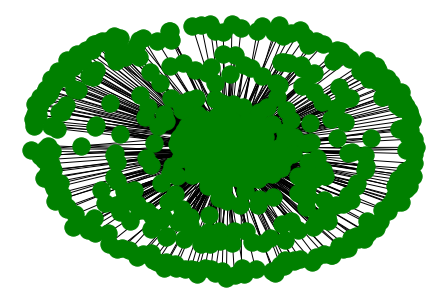

In [27]:
nx.draw(G,with_labels=False,node_color='g')


In [28]:
#output the Graph to Gephi
nx.write_gexf(G, "Syngenta.gexf")